In [ ]:
import random
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [ ]:
def borders(a_coef, b_coef):
    x0_max = float(a_coef/2)
    x0_min = 0.0
    
    y0_max = float(b_coef/2)
    y0_min = 0.0
    
    x1_max = float(a_coef)
    x1_min = float(a_coef/2)
    
    y1_max = float(b_coef)
    y1_min = float(b_coef/2)
    
   
    return x0_max, y0_max, x0_min, y0_min, x1_max, y1_max, x1_min, y1_min

In [ ]:
def initialize_dataset(n_examples, classType):
    X = np.zeros([n_examples, 2], dtype=np.float16)
    y = classType*np.ones([n_examples, 1], dtype=np.float16)
    return X, y

In [ ]:
def random_coord(x_max, y_max, x_min, y_min, n_random_coord, n_examples, classType):
    
    X, y= initialize_dataset(n_examples, classType)
    
    for i in range(n_random_coord):
        X[i][0] = random.uniform(x_min, x_max)
        X[i][1] = random.uniform(y_min, y_max)
        
        #print(i,"x: ",X[i][0], "    y: ", X[i][1], "Sınıf: ", y[i])

    return X, y

In [ ]:
def euclidean_distance(x1, y1, x2, y2):
    euclidean_distance = distance.euclidean([x1, y1] , [x2, y2])
    #euclidean_distance = math.dist([x1, y1] , [x2, y2])
    return euclidean_distance

In [ ]:
def class_(n_examples, X, y, count, min_change):
    j = 0
               #300
    while(j < count):
        rand_number = random.randint(0, count)
        distances = []
        indexes = []

        for i in range(count):
            if(i != rand_number):
                distance = euclidean_distance(X[rand_number][0],X[rand_number][1], X[i][0],X[i][1])
                distances.append(distance)
                indexes.append(i)
                #if(distance == 0):
                    #print("Kontrol: ", distance, i , rand_number)

        for i in range(min_change):
            min_distance = min(distances)
            index = distances.index(min_distance)
            distances.remove(min_distance)
            del indexes[index]
            
            min_distance = min(distances)
            index = distances.index(min_distance)
            index = indexes[index]
        
        count+=1
        x_coord = X[rand_number][0] + abs(X[rand_number][0]-X[index][0])*random.random()
        y_coord = X[rand_number][1] + abs(X[rand_number][1]-X[index][1])*random.random()
        
        mevcut = 0
        for x in range (count-1):
            if(x_coord==X[x][0] and y_coord==X[x][1]):
                mevcut=1
        if(mevcut==0):
            X[count][0] = x_coord
            X[count][1] = y_coord
            y[count] = y[rand_number][0]
            #print("En yakın nokta :", X[index][0], X[index][1], "Mesafe: ", min_distance)
            #print("Yeni nokta :", X[count][0], X[count][1])
            
            if(count+1 <n_examples):
                j+=1
            else:
                break
            
        else:
            count-=1
            j-=1
    
    return X, y

In [ ]:
class Layer:
    def __init__(self, X, pre_activation, output, W, b, dW, db, dpre_activation, activation_func, activation_derivative):
        
        self.W =  W
        self.b = b
        
        self.X = X
        self.pre_activation = pre_activation
        self.output = output
        
        self.dW = dW
        self.db = db
        self.dpre_activation = dpre_activation
        
        self.activation_func = activation_func
        self.activation_derivative = activation_derivative

In [ ]:
def relu(pre_activation):
    
    output = np.maximum(0,pre_activation)
    
    return output

In [ ]:
def relu_derivative(doutput, pre_activation):

    dpre_activation = np.array(doutput, copy=True) 
    dpre_activation[pre_activation <= 0] = 0

    return dpre_activation


In [ ]:
def tanh(pre_activation):
    output = np.tanh(pre_activation)
    return output

In [ ]:
def tanh_derivative(doutput, pre_activation):
    doutput = (1 - np.power(pre_activation, 2))
    return doutput

In [ ]:
def sigmoid(pre_activation):
    
    output = 1/(1+np.exp(-pre_activation))
    
    return output

In [ ]:
def sigmoid_derivative(doutput, pre_activation):

    s = 1/(1+np.exp(-pre_activation))
    dpre_activation = doutput * s * (1-s)

    return dpre_activation

In [ ]:
def nn_model(X, y, network, learning_rate, num_iterations):                     
 
    layers = initialize_layers(network, X.shape)

    for i in range(num_iterations):

        prediction, layers = forward_propagation(X, layers)

        cost = compute_cost(prediction, y) #loss ve dloss ekle
        
        layers = backward_propagation(prediction, y, layers)
        
        layers = update_parameters(layers, learning_rate)
        
        if(i % 100 == 0):
            print(i," Cost: ", cost)
    
    return layers

In [ ]:
def initialize_layers(network, Xshape):
    
    n_layer = len(network["hidden_layer"])+1
    n_input = network["n_input"]      #2 

    if(n_layer > 1):
      activation_func = network["hidden_activation_func"]
      activation_derivative = network["hidden_activation_derivative"]
      n_neuron = network["hidden_layer"][0]
    
    layers = []
    for l in range(n_layer):
        
        if(l == n_layer-1):
            n_neuron = 1
            activation_func= network["output_activation_func"]
            activation_derivative = network["activation_derivative"]
        W = np.random.randn(n_neuron, n_input) * 0.01
        b = np.zeros((n_neuron, 1))

        X = np.zeros((Xshape[0], Xshape[1]))
        pre_activation = np.zeros((n_neuron, Xshape[1]))
        output = np.zeros((n_neuron, Xshape[1]))
        
        Xshape = output.shape
        
        dW = W
        db = b 
        doutput = output
        
        layer = Layer(X, pre_activation, output, W, b, dW, db, doutput, activation_func, activation_derivative) 
    
        layers.append(layer)
         
        n_input = n_neuron
               
    return layers

In [ ]:
def forward_propagation(X, layers):

    output = X
    L = len(layers) - 1             

    for l in range(L):
        X = output 
        W = layers[l].W
        b = layers[l].b
        
        activation = layers[L].activation_func
        
        output, pre_activation = forward(X, W, b, activation)
    
        layers[l].output = output
        layers[l].pre_activation = pre_activation
        layers[l].X = X
        
    activation = layers[L].activation_func
    prediction, pre_activation = forward(output, layers[L].W, layers[L].b, activation) 
 
    prediction[prediction <= 0] = -1
    prediction[prediction > 0] = 1
 
    layers[L].output = prediction
    layers[L].pre_activation = pre_activation
    layers[L].X = X
    
    return prediction, layers

In [ ]:
def forward(X, W, b, activation):
    pre_activation = np.dot(W, X) + b
    output = activation(pre_activation)
    
    return output, pre_activation

In [ ]:
def compute_cost(prediction, y):

    m = y.shape[1]

    loss = np.square(prediction-y)*(1/2)
    cost = np.sum(loss)/m
    #cost = -(1/m)*(np.dot(y, np.log(prediction.T)) + np.dot(1-y, np.log(1-prediction.T)))
      
    return cost

In [ ]:
def cost_derivative(prediction, y, m):
    dprediction = (2/m) * sum(prediction - y)
    return dprediction

In [ ]:
def backward_propagation(prediction, y, layers):

    L = len(layers) - 1
    m = prediction.shape[1]
    y = y.reshape(prediction.shape)

    dprediction =cost_derivative(prediction, y, m)

    activation_derivative = layers[L].activation_derivative 
    doutput, dW, db = backward(dprediction, layers[L], activation_derivative)
    layers[L].doutput = doutput
    layers[L].dW = dW
    layers[L].db = db
    
    for l in reversed(range(L)):
        
        activation_derivative = layers[L].activation_derivative 
        doutput, dW, db = backward(layers[l+1].doutput, layers[l], activation_derivative)
        
        layers[l].doutput = doutput
        layers[l+1].dW = dW
        layers[l+1].db = db

    return layers

In [ ]:
def backward(doutput, layer, activation_derivative):
    
    dpre_activation = activation_derivative(doutput, layer.pre_activation)
    
    m = layer.output.shape[1]

    dW = np.dot(dpre_activation, layer.output.T)*(1/m)
    db = np.sum(dpre_activation, axis=1, keepdims=True)*(1/m)
    doutput = np.dot(layer.W.T, dpre_activation)
    
    return doutput, dW, db

In [ ]:
def update_parameters(layers, learning_rate):

    L = len(layers) - 1 
    for l in range(L):
        #print(layers[l].W)
        layers[l].W = layers[l].W - learning_rate*layers[l].dW
        layers[l].b = layers[l].b - learning_rate*layers[l].db

    return layers

In [ ]:
def predict(X, layers):

    output = X
    L = len(layers) - 1             

    for l in range(L):
        X = output 
        W = layers[l].W
        b = layers[l].b
        
        activation = layers[L].activation_func
        
        output, pre_activation = forward(X, W, b, activation)
        
    activation = layers[L].activation_func
    prediction, pre_activation = forward(output, layers[L].W, layers[L].b, activation) 
    
        
    prediction[prediction <= 0] = -1
    prediction[prediction > 0] = 1
    
    return prediction, layers

In [ ]:
#Veri seti oluşturma

In [ ]:
n_examples0 = 200  # 0. sınıfın veri sayısı
n_examples1 = 300  # 1. sınıfın veri sayısı
n_examples = 300 # Sınıfların karışması için fazladan ekleme
n_examples = n_examples0 + n_examples1 + n_examples

n_random_coord = 50 #İlk belirlenecek nokta sayısı
min_change = 10      #Sınıfların karışması için

a_coef, b_coef= 0.1, 0.1 #doğrunun katsayıları


In [ ]:
# Sınıfların sınırlarının belirlenmesi
x0_max, y0_max, x0_min, y0_min, x1_max, y1_max, x1_min, y1_min = borders(a_coef, b_coef)

In [ ]:
#Sınıfları random başlat
X0, y0 = random_coord(x0_max, y0_max, x0_min, y0_min, n_random_coord, n_examples0, 1)
X1, y1 = random_coord(x1_max, y1_max, x1_min, y1_min, n_random_coord, n_examples1, -1)

In [ ]:
# Sınıfları uzaklığa göre benzet
X0, y0 = class_(n_examples0, X0, y0, n_random_coord, min_change)
X1, y1 = class_(n_examples1, X1, y1, n_random_coord, min_change)

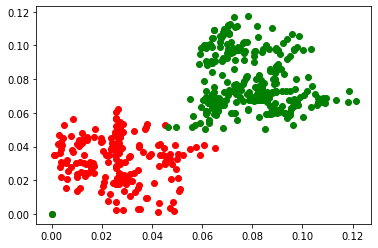

In [ ]:
#Sınıfları birleştir
X, y= initialize_dataset(n_examples, 0) 

for i in range(n_examples0):
    
    X[i][0] = X0[i][0]
    X[i][1] = X0[i][1]
    y[i] = y0[i]
    plt.scatter(X[i][0], X[i][1], c='r')
for i in range(n_examples1):
    
    X[i+n_examples0][0] = X1[i][0]
    X[i+n_examples0][1] = X1[i][1]
    y[i+n_examples0] = y1[i]
    plt.scatter(X[i+n_examples0][0], X[i+n_examples0][1], c='g')

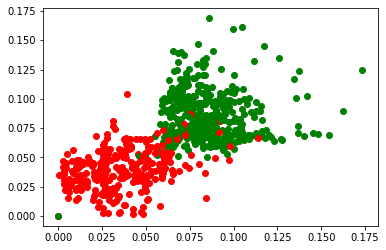

In [ ]:
# Sınıf karışıklığını belirle
min_change = 270 #büyüdükçe diğer sınıfla birleşir
X, y = class_(n_examples, X, y, (n_examples0+n_examples1), min_change)
for i in range(n_examples):
    if(y[i] == 1):
        plt.scatter(X[i][0], X[i][1], c='r')
    elif(y[i] == -1):
        plt.scatter(X[i][0], X[i][1], c='g')

In [ ]:
# model oluşturma

In [ ]:
hidden_layer = [10]
hidden_activation_func = relu
hidden_activation_derivative = relu_derivative
output_activation_func = tanh
activation_derivative = tanh_derivative

learning_rate= 1.75
num_iterations = 100

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train = X_train.reshape(X_train.shape[1], X_train.shape[0])
y_train = y_train.reshape(y_train.shape[1], y_train.shape[0])

X_test = X_test.reshape(X_test.shape[1], X_test.shape[0])
y_test = y_test.reshape(y_test.shape[1], y_test.shape[0])

In [ ]:
network = {
    "n_input": X_train.shape[0], # Öznitelik sayısı
    "hidden_layer":hidden_layer,
    "hidden_activation_func": hidden_activation_func, # Gizli katmanlardaki aktivasyon fonksiyonu
    "hidden_activation_derivative": hidden_activation_derivative,
    "output_activation_func": output_activation_func,   # Çıkış katmanındaki aktivasyon fonksiyonu
    "activation_derivative": activation_derivative
}

In [ ]:
layers= nn_model(X_train, y_train, network, learning_rate, num_iterations)

0  Cost:  1.0475


In [ ]:
predictions, layers = predict(X_test, layers)

In [ ]:
true=0
for i in range(X_test.shape[1]):
    if(predictions[0][i] == y_test[0][i]):
        print(predictions[0][i])
        true+=1
    else:
        a=0
        #print(predictions[0][i], y_test[0][i])
accuracy=true/(i+1)*100
print("Accuracy: %", true/(i+1)*100)